# Customer Churn Prediction Project 📉

## 🔍 Overview
This project aims to develop a machine learning model to predict **customer churn** — that is, whether a customer will cancel their subscription to the service. This prediction helps businesses reduce revenue loss by proactively identifying customers at risk of leaving and taking retention actions.

## 🎯 Business Objective
- Predict customers who are likely to churn (`Churn = 1`)
- Enable the business to take preventive measures like discounts, personalized offers, or better customer support
- Focus on **precision** and **recall**, since identifying true churners is more valuable than just getting high accuracy

## 📊 Dataset Description
The dataset contains the following features:

| Column | Description |
|--------|-------------|
| `CustomerID` | Unique identifier for each customer |
| `Age` | Customer's age |
| `Gender` | Male or Female |
| `Tenure` | Number of months the customer has been subscribed |
| `Usage Frequency` | How often the customer uses the service |
| `Support Calls` | Number of times the customer contacted support |
| `Payment Delay` | Number of days payment was delayed |
| `Subscription Type` | Type of subscription plan (e.g., Basic, Premium) |
| `Contract Length` | Duration of the customer's contract in months |
| `Total Spend` | Total amount spent by the customer |
| `Last Interaction` | Number of days since the last customer interaction |
| `Churn` | Target variable — 1 if the customer churned, 0 otherwise |

## ⚙️ Project Workflow
1. **Exploratory Data Analysis (EDA)** – Understand distributions, relationships, and outliers
2. **Data Preprocessing** – Handle missing values, encode categorical features, scale numerical values
3. **Imbalanced Data Handling** – Use techniques like:
   - SMOTE (Synthetic Minority Over-sampling Technique)
   - Class weights in classification algorithms
4. **Model Training & Evaluation** – Try multiple models:
   - Logistic Regression
   - Random Forest
   - XGBoost
5. **Model Evaluation Metrics**:
   - Precision
   - Recall
   - F1-score
   - Confusion Matrix
   - ROC-AUC Curve

## 🧠 Goal
To build a predictive model that helps the company **identify churn-prone customers early**, so that customer success teams can retain them effectively.

## 🛠️ Tools & Libraries
- **Python**
- **Pandas, NumPy** – Data manipulation
- **Seaborn, Matplotlib** – Visualization
- **Scikit-learn** – Machine learning models & metrics
- **XGBoost** – Advanced gradient boosting model
- **imbalanced-learn** – SMOTE and other resampling techniques

---

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [7]:
train_data = pd.read_csv('DATA/Uneeq_Churn/customer_churn_dataset-training-master.csv')

# Exploratory Data Analysis (EDA)

In [9]:
train_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [10]:
test_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [11]:
train_data.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [13]:
for column in train_data.columns :
    if train_data[column].dtype == 'object' :
        print(train_data[column].value_counts())

Gender
Male      250252
Female    190580
Name: count, dtype: int64
Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64
Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


---
# 🧾 Categorical Data Insights:
## Gender:

- There are more Male customers (250,252) than Female customers (190,580).

- The dataset has a somewhat imbalanced gender distribution, with males representing about 57% of the customers.

## Subscription Type:

- The subscription types are fairly evenly distributed:

    - Standard: 149,128 customers

    - Premium: 148,678 customers

    - Basic: 143,026 customers

#### This balanced distribution suggests the model can learn patterns across all subscription types without bias toward one.

## Contract Length:

- Most customers are on Annual (177,198) or Quarterly (176,530) contracts.

- Fewer customers have Monthly contracts (87,104).

#### This imbalance might affect churn predictions, as contract length can strongly influence customer retention.
---


In [15]:
train_data.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [16]:
train_data[train_data.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.duplicated().sum()

0

#### We see that their is no duplicates and just onr messing value

In [19]:
train_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


---
# 🧠 Key Observations:
- The customers’ ages range from 18 to 65 years, with a median age of 39, indicating an adult customer base.

- The average subscription tenure is around 31 months, with a maximum of 60 months.

- The target variable Churn is binary (0 = retained, 1 = churned), with approximately 56.7% customers having churned.

- Customers make up to 10 support calls, but the median number of calls is only 3.

- Payment delays can be as long as 30 months, which could be an important churn indicator.

- Total Spend ranges between 100 and 1000, likely a significant factor for customer loyalty.

# ✅ Insights:
- The dataset is somewhat imbalanced regarding churn (around 56.7% churned).

- Important features to consider for predicting churn include:

    - Tenure

    - Payment Delay

    - Support Calls

    - Total Spend
---

## Data Visualization

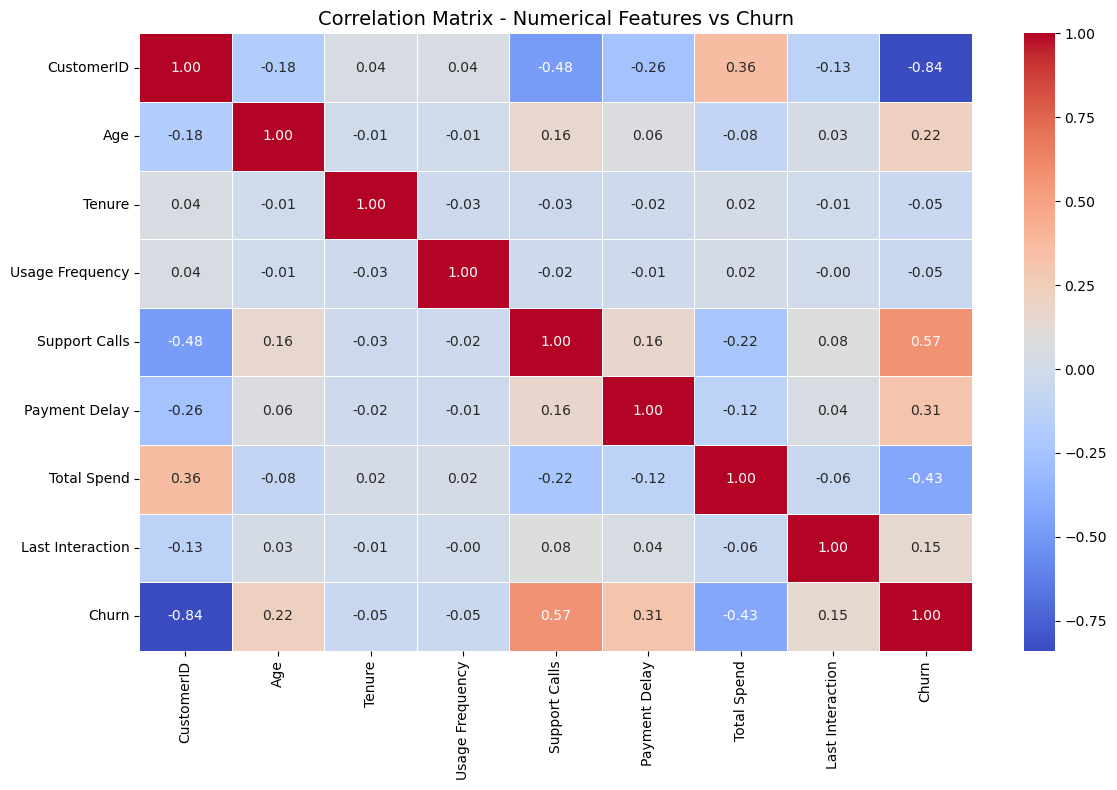

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features vs Churn', fontsize=14)
plt.tight_layout()
plt.show()

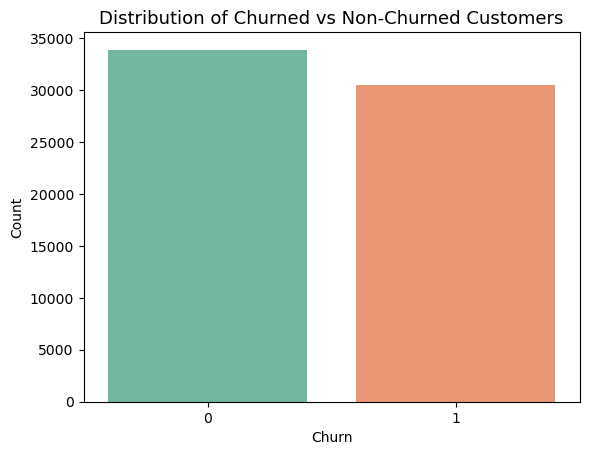

In [23]:
sns.countplot(data=test_data, x='Churn', palette='Set2')
plt.title('Distribution of Churned vs Non-Churned Customers', fontsize=13)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

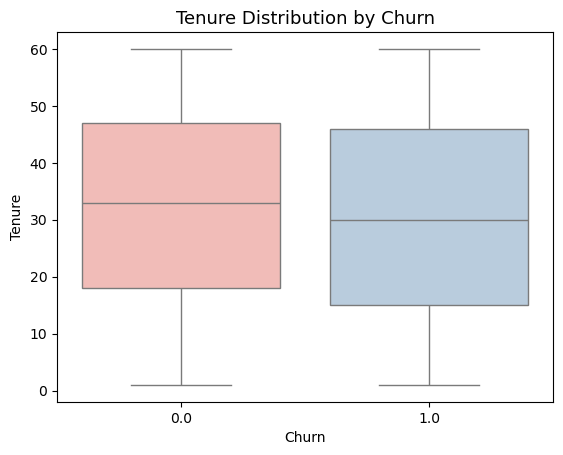

In [24]:
sns.boxplot(data=train_data, x='Churn', y='Tenure', palette='Pastel1')
plt.title('Tenure Distribution by Churn', fontsize=13)
plt.show()

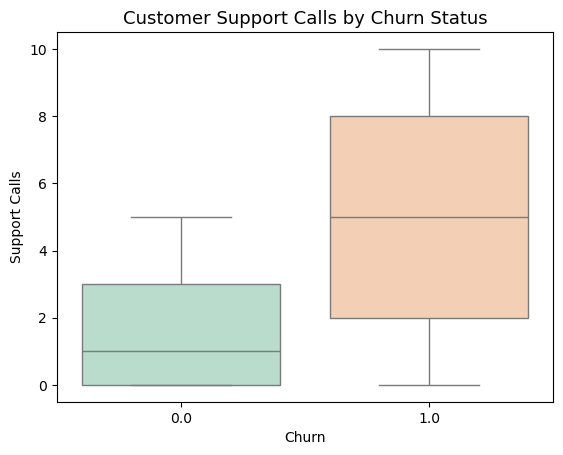

In [25]:
sns.boxplot(data=train_data, x='Churn', y='Support Calls', palette='Pastel2')
plt.title('Customer Support Calls by Churn Status', fontsize=13)
plt.show()

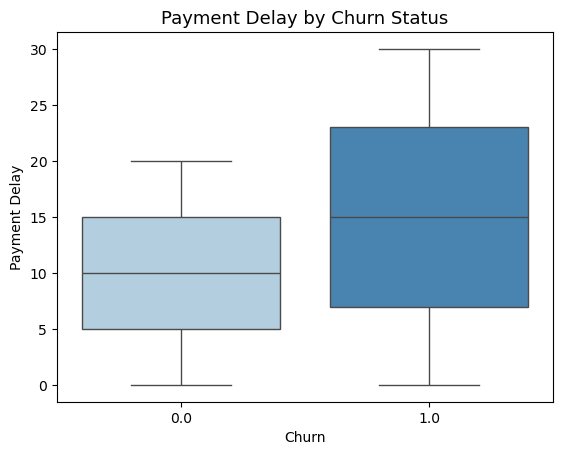

In [26]:
sns.boxplot(data=train_data, x='Churn', y='Payment Delay', palette='Blues')
plt.title('Payment Delay by Churn Status', fontsize=13)
plt.show()

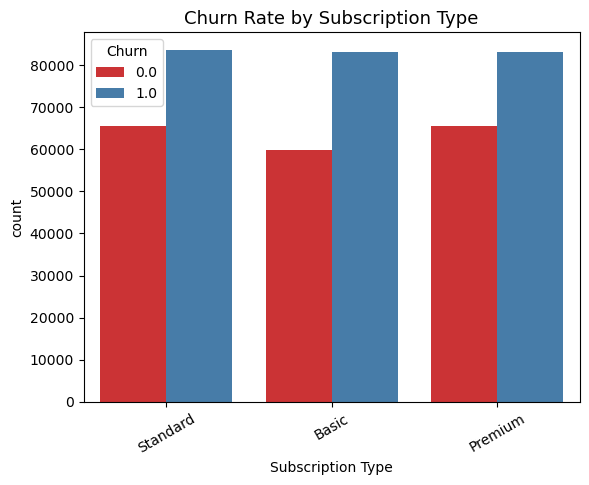

In [27]:
sns.countplot(data=train_data, x='Subscription Type', hue='Churn', palette='Set1')
plt.title('Churn Rate by Subscription Type', fontsize=13)
plt.xticks(rotation=30)
plt.show()

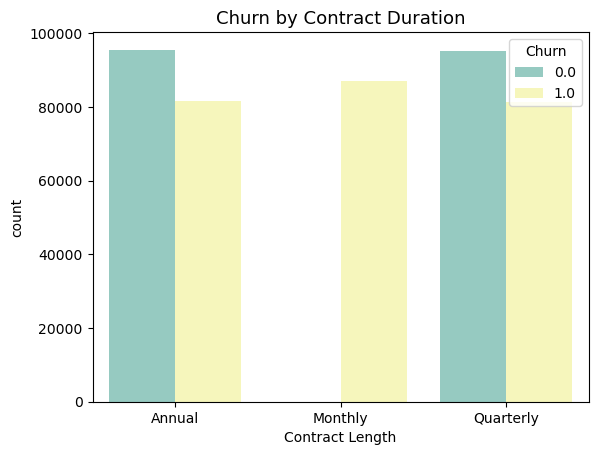

In [28]:
sns.countplot(data=train_data, x='Contract Length', hue='Churn', palette='Set3')
plt.title('Churn by Contract Duration', fontsize=13)
plt.show()

# Customer Churn Analysis Summary

- **Contract Duration Impact:**  
  All customers with **annual contracts** churned, while customers with **monthly** or **two-year contracts** partially stayed.  
  → This indicates that contract length has a significant impact on customers' decision to stay or leave.

- **Customer Service Calls:**  
  Customers who churned made more customer service calls.  
  → Higher volume of support calls suggests dissatisfaction or unresolved issues.

- **Payment Issues:**  
  Payment problems were more prevalent among churned customers, especially those with annual contracts.  
  → Payment difficulties tied to annual contracts are a key factor in churn.

---

## Insights:
- Contract length is a crucial factor influencing customer retention.  
- Frequent customer service interactions and payment issues are strong indicators of potential churn.  
- These findings can guide us in improving customer retention strategies by focusing on contract terms, support quality, and payment processes.


# Data Preprocessing

In [31]:
train_data.dropna(inplace=True)

In [32]:
LE = LabelEncoder()
for column in train_data.columns :
    if train_data[column].dtype == 'object' :
        train_data[column] = LE.fit_transform(train_data[column])

In [33]:
train_data.head(1)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0


In [34]:
LE = LabelEncoder()
for column in test_data.columns :
    if test_data[column].dtype == 'object' :
        test_data[column] = LE.fit_transform(test_data[column])

In [35]:
test_data.head(1)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1


In [36]:
train_data["Is_Loyal"] = ((train_data["Tenure"] > 30) & 
                  (train_data["Contract Length"] == "0") & 
                  (train_data["Subscription Type"] == "2")).astype(int)

## Data Splitting

In [52]:
X = train_data.drop(['CustomerID','Churn'], axis=1)  
y = train_data['Churn']              

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [53]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [54]:
print(y_train.value_counts())

Churn
1.0    199895
0.0    152770
Name: count, dtype: int64


## Data balancing

In [56]:
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [57]:
# print(y_train_res.value_counts())

# Model

In [59]:
model_lr = RandomForestClassifier(n_estimators=100, random_state=42)
model_lr.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
model_lr_weighted = LogisticRegression(max_iter=1000, random_state=42)
model_lr_weighted.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [61]:
from sklearn.metrics import roc_curve

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

Confusion Matrix:
 [[32318  5745]
 [ 7440 42664]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38063
         1.0       0.88      0.85      0.87     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167

ROC AUC Score: 0.9284327177617313


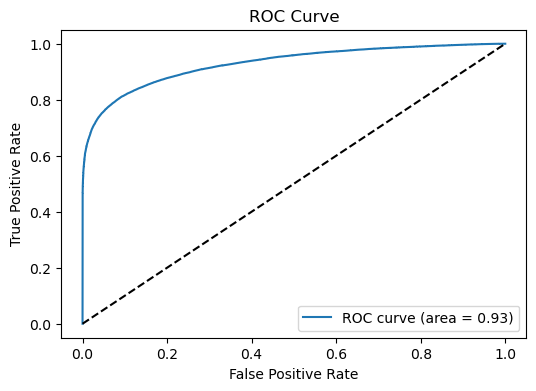

In [62]:
evaluate_model(model_lr_weighted, X_test, y_test)